In [4]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

## Logistic Regression
`Logistic regression is a classification method which is mostly used for the binary classification, it gives outcome as a probability(in the range from 0 to 1), It uses sigmoid function on the linear equation.`

`We use sigmoid function to bring output (prediction from equation of line) in the range of 0 to 1, it gives probabilistic output. We use sigmoid which gives us the probability that the output is 1.` <br>


`Imagine you have some input features like age and salary of a person. You want to predict binary outcome whether a person will buy a product (yes or no). In this case we can use logistic regression where we want to make binary decision. It gives probabilities of the outcome and allows you to set a threshold to classify.`

**Instead of predicting values directly, it predicts the `log-odds` of the event happening, and then converts it into a probability using special function called the sigmoid function.**

#### Odds
**Odds helps us to understand the ratio/relationship between something/event happening and not happening.**

#### Log-Odds
**Log-Odds is the log of odds. As we take log it becomes linear expression.**

#### what do you mean by log-odds
`Suppose you are trying to predict whether something will happen (event= 1) or not (event= 0).` <br>
`Now` <br>
> `Probability of success (event= 1) = p` <br>
> `Probability of failure (event= 0) = 1 - p`

`So, we can define the odds of success as -`
> **odds = p / (1 - p)**

##### Odds Example
* `if p = 0.8 (80% chance)` <br> `odds = 0.8/0.2` <br> `= 4` <br> `4 to 1 in favor of success` <br>
* `if p = 0.2 (20% chance)` <br> `odds = 0.2/0.8` <br> `= 0.25` <br> `1 to 4 in against success`
 
`Now log-odds means taking the logarithm of the odds as -`
> **Log-odds = log(p / (1 - p))**
>> `Odds is non-negative (0 to inf)` <br>
>> `Log-odds can be any real number (-inf to +inf)`

**p------------------------ odds --------------------------- Log-odds** <br>
> 0.5-------------------- 1 --------------------------- 0 <br>
> 0.8-------------------- 4 --------------------------- +ve (around 1.39) <br>
> 0.2-------------------- 0.25 ------------------------ -ve (around -1.39)


#### Why Log-odds
`Because`
> `Linear models (like logistic regression) are very good at modeling things that range from -inf to +inf.` <br>
> `So instead of modeling p directly (which is restricted to (0 to 1)), we model log-odds as a linear function of inputs-`
>> **Log-Odds = (linear function of inputs) = w_0 + w_1 * x_1 + w_2 * x_2 + ----- + w_n * x_n**

`So in logistic regression, what we actually model is-` <br>
**log(p / 1-p) = w_0 + w_1 * x_1 + w_2 * x_2 + ----- + w_n * x_n** <br>
`Then, if we want p back we reverse the operation.` <br>
`For that we use the sigmoid function-` <br>
**sigmoid(z) = 1 / (1 + e^-z)** <br>
`Where, z is w_0 + w_1 * x_1 + w_2 * x_2 + ----- + w_n * x_n`


#### Intution
> * `If z is very large and positive, sigmoid(z) similar to 1 (high probability)` <br>
> * `If z is very large and negative, sigmoid(z) similar to 0 (low probability)` <br>
> * `If z = 0, sigmoid(z) = 0.5 (exactly 50-50 chance)`

`Sigmoid function-`
* `S-Shaped` <br>
* `Smooth and continuous` <br>
* `Squashes inputs from (-inf,+inf) to (0,1)`

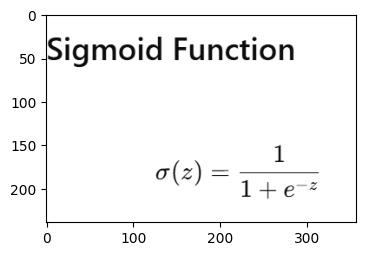

In [12]:
i = plt.imread("sigmoid.png")
plt.figure(figsize= (4,4))
plt.imshow(i);

#### Sigmoid

> **When z = 0** <br> `Model is unsure, gives sigmoid = 0.5` <br>
> **When z = +Inf(Very Large)** <br> `There is positive relation between z and σ(sigmoid), if z increases sigmoid also increases and vice-versa.` <br> `There is negative relation between e^-z and σ(sigmoid), if z increases sigmoid decreases and vice-versa.` <br>
> **When z = -Inf(Very Small)** <br> `There is positive relation between z and σ(sigmoid), if z decreases sigmoid also decreases and vice-versa.` <br> `There is negative relation between e^-z and σ(sigmoid), if z decreases sigmoid increases and vice-versa.`

`where,` <br>
* `z is the value of equation of line.` 

`Sigmoid grows slowly when values of z are less than zero, shoots up around zero, and then again starts flattening. We say below a threshold probability is 0 otherwise 1.`

`Example-`

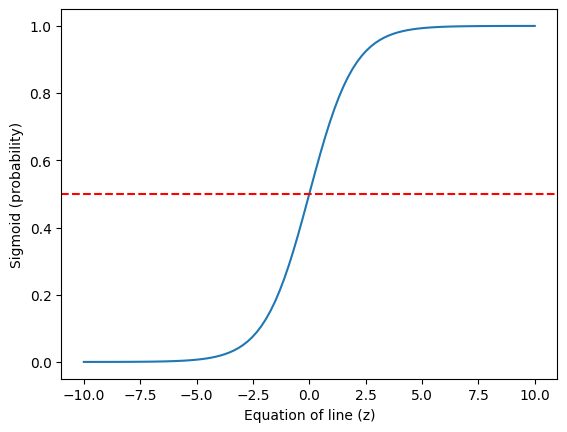

In [18]:
data1 = np.around(np.linspace(-10, 10 , 100),3)

plt.plot(data1, sigmoid(data1))
plt.hlines(0.5,-11, 11, linestyles= '--', colors= 'red') # Threshold
plt.xlim((-11,11))
plt.xlabel('Equation of line (z)')
plt.ylabel('Sigmoid (probability)')
plt.show();

s1 = []
for i in sigmoid(data1):
    s1.append(f"{i:.2f}")


In [19]:
# data of z and sigmoid for above example
pd.DataFrame({'z': data1, 'sigmoid': sigmoid(data1)})

,z,sigmoid
0,-10.000,0.000045
1,-9.798,0.000056
2,-9.596,0.000068
3,-9.394,0.000083
4,-9.192,0.000102
...,...,...
95,9.192,0.999898
96,9.394,0.999917
97,9.596,0.999932
98,9.798,0.999944


### Likelihood Maximization Problem
`You want your model to say:`
> * `For samples where y = 1, the predicted probability p should be high` <br>
> * `For samples where y = 0, the predicted probability p should be low`

`Thus you want to maximize the chance (likelihood) that the model predicts correctly for the entire dataset.`

`Mathematically, for one datapoint-`
> * `If true label y = 1, probability is p` <br>
> * `If true label y = 0, probability is 1-p`

`General formula for above is -` <br>
**Probability of correct prediction = p^y x (1-p)^(1-y)**
> `If y = 1, it becomes p` <br>
> `If y = 0, it becomes 1-p`

`For entire dataset(say m samples), the likelihood is the product over all samples-`

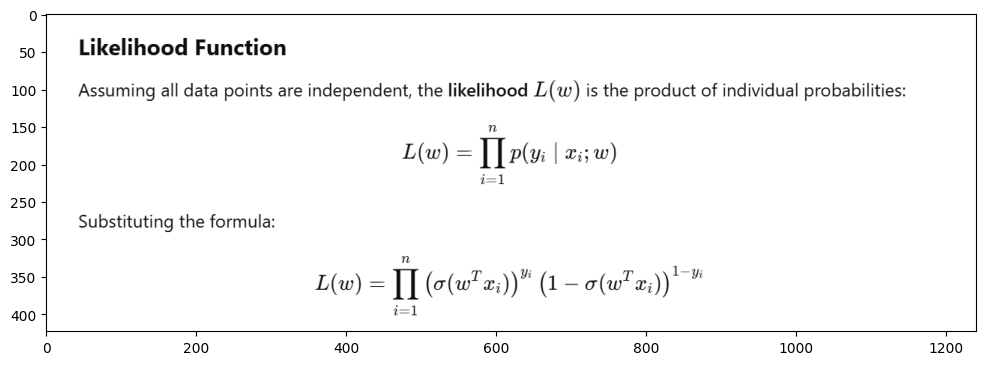

In [20]:
plt.figure(figsize= (12,8))
plt.imshow(plt.imread('likelihood_max.png'));

`Where,`
> (sigmoid(w.T * x_i)) = `models predicted probability for the i'th sample` <br>
> y_i = `true label (0 or 1)`

#### Log likelihood
`Products are messy. So, take log to convert products into sums. Log-Likelihood L becomes:`

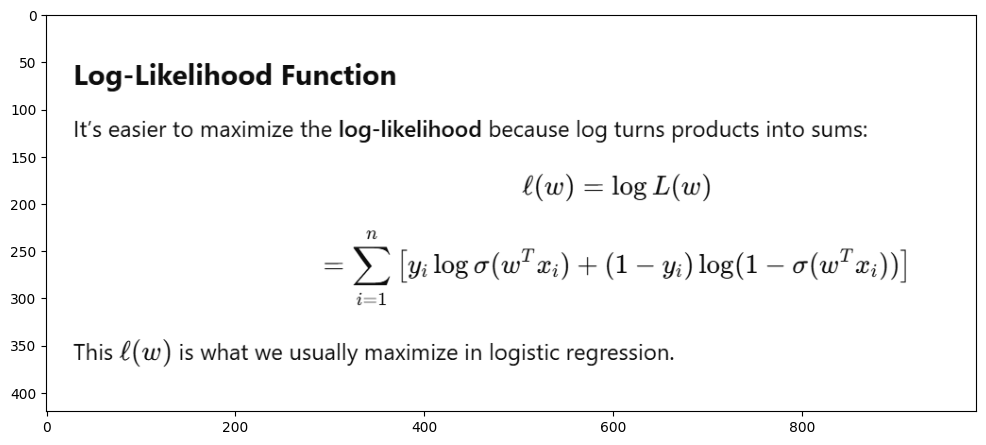

In [21]:
plt.figure(figsize= (12,8))
plt.imshow(plt.imread('log_likelihood.png'));

### Objective
`Now, training becomes a mathematical optimization problem:`
> `Maximize the log-likelihood L(w)`

`Or equivalently,`
> `Minimize the negative log-likelihood (called loss or cost function)`

**y_hat = 1 / 1 + e^-z (sigmoid function)** <br>
* `y_hat is the probability of 1`

`For example if we need to predict diabetes on the basis of sugar level where 1 means diabetes and 0 means no diabetes.` <br> <br>
`If Sugar Level is 150.`
> `Initial weights = 0.01 and bias = -5,` <br> `z = 150*0.05 - 7` <br> `z = 0.5` <br> `But its not the probability.` <br>
> `Sigmoid = 1/1+2.718**-0.5` <br> `σ = 0.622` <br> `There is a 62.2% chance this person has diabetes. If our threshold is 0.5, we’d predict class 1 (has diabetes).`

`If Sugar Level is 110.`
> `Initial weights = 0.01 and bias = -5,` <br> `z = 110*0.05 - 7` <br> `z = -1.5` <br> `But its not the probability.`<br>
> `Sigmoid = 1/1+2.718**1.5` <br> `σ = 0.182` <br> `There is a 18.2% chance this person has diabetes. If our threshold is 0.5, we’d predict class 0 (has no diabetes).`

`To optimize the value we need to check how good our prediction is. For that we use Binary Cross-Entropy also known as Log Loss.`

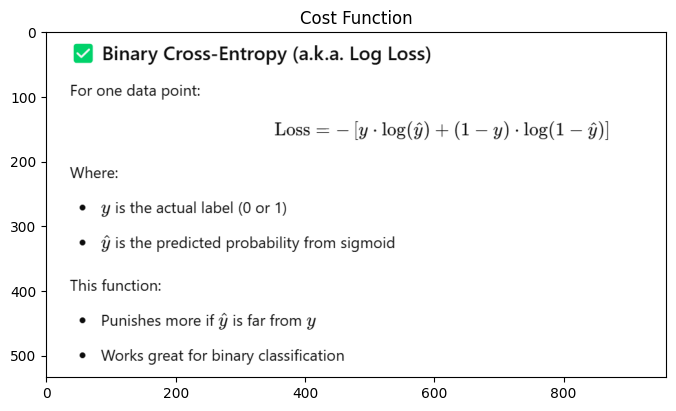

In [22]:
i = plt.imread("bce.png")
plt.figure(figsize= (8,8))
plt.title('Cost Function')
plt.imshow(i);

* `- (minus) is in the formula because log of any number below 1 is negative so to get a positive answer we multiply it by - (minus) or we can say that - sign is for converting negative number to positive number as log between 0 and 1 gives us negative output and loss should be always positive.` <br>
* `log is in the formula because log is used to find the actual loss like log of 1 is 0, if y = 1 then y*log(y_hat) get activate which give us 0 as output which makes sense as both y and y_hat are same.` <br>
* `y and (1-y) are also for adjustment like if  y (actual output) = 1 then 2nd term will be neglected whereas if y = 0 1st term will be neglected.` <br>
* `log(y_hat) if 1 and actual also 1 it means there is no loss.`

`Binary Cross-Entropy is a loss function we use when solving classification problems — especially when the output is either 0 or 1. It measures how far off the model’s predicted probability is from the actual label. If the model predicts a probability close to the true value, the loss is low. If it's way off, the loss increases sharply.` <br>
`This works as a smart switch: when the true label is 1, only the first term is active; if the label is 0, only the second term is active. The log helps penalize wrong predictions more strongly — especially when the model is very confident and wrong.` <br>
`We use the negative sign because the log of a number between 0 and 1 is negative — and we want our loss to be positive. Also, it's compatible with the sigmoid function, which makes gradient descent simpler and efficient.`

`For example -`

In [23]:
# If the model predicts 0.7
y = 1
y_hat = 0.7

loss = -(y * np.log(y_hat) + (1- y) * np.log(1 - y_hat))
loss

np.float64(0.35667494393873245)

In [24]:
# If the model predicts 0.9
y = 1
y_hat = 0.9

loss = -(y * np.log(y_hat) + (1- y) * np.log(1 - y_hat))
loss

np.float64(0.10536051565782628)

`You can clearly see smaller loss for better prediction`

`Now if we want to minimize the total loss. We need to find the optimized learning parameters (w & b) for that we need to calculate the derivative of the loss function with respect to w & b and use the updation rule to update the values.`

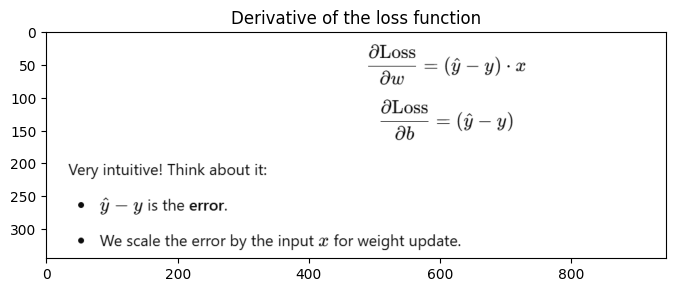

In [11]:
i = plt.imread(r"C:\Users\Atharv Soni\Palakk\Machine Learning\Supervised\Classification\logistic\bce2.png")
plt.figure(figsize= (8,8))
plt.title('Derivative of the loss function')
plt.imshow(i);

`After each prediction:`

1. **Compute 𝑧 = 𝑤 ⋅ 𝑥 + 𝑏**
2. **Compute y_hat = 𝜎(𝑧)**
3. **Compute error: 𝑦_hat - 𝑦**
4. **Update w and b:** `Using the update rule`

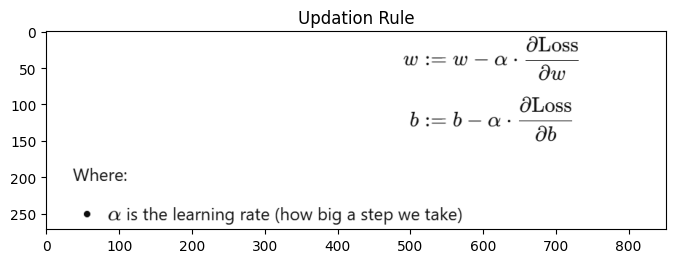

In [26]:
i = plt.imread("bce1.png")
plt.figure(figsize= (8,8))
plt.title('Updation Rule')
plt.imshow(i);

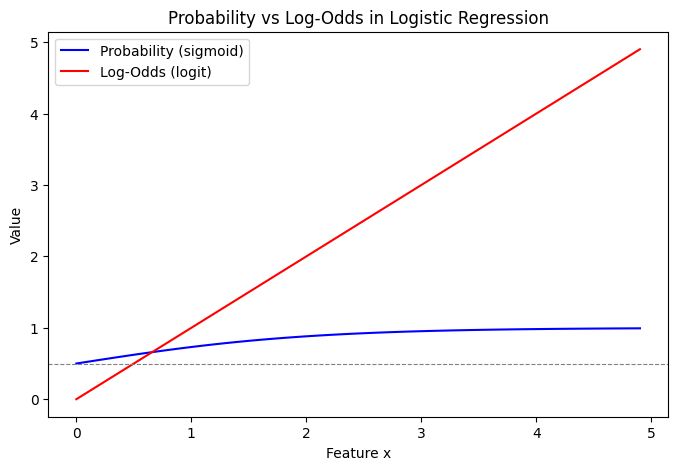

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5, 0.1)
# Example logistic regression parameters
w0, w1 = 0, 1

# Calculate linear part
z = w0 + w1 * x

# Probability using sigmoid
p = 1 / (1 + np.exp(-z))

# Log-odds
log_odds = np.log(p / (1 - p))

plt.figure(figsize=(8, 5))
plt.plot(x, p, label='Probability (sigmoid)', color='blue')
plt.plot(x, log_odds, label='Log-Odds (logit)', color='red')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Feature x')
plt.ylabel('Value')
plt.title('Probability vs Log-Odds in Logistic Regression')
plt.legend()
plt.show()

✅ **Pros of Logistic Regression**

| Point                                         | Explanation                                                                        |
| --------------------------------------------- | ---------------------------------------------------------------------------------- |
| **1. Easy to understand**                     | Simple math — outputs probabilities using a sigmoid function. Great for beginners. |
| **2. Fast to train**                          | Works well even on small datasets and trains quickly.                              |
| **3. Interpretable**                          | You can understand how each feature affects the outcome using model coefficients.  |
| **4. Works well for linearly separable data** | Performs very well when classes can be separated by a straight line.               |
| **5. Outputs probabilities**                  | Unlike some models, it gives a confidence score (probability) for each prediction. |
| **6. No need for high computation**           | Doesn’t require heavy processing power like deep learning models.                  |

❌ **Cons of Logistic Regression**

| Point                                            | Explanation                                                                                                                       |
| ------------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------- |
| **1. Assumes linear relationship (in log-odds)** | If data is not linearly separable, performance drops.                                                                             |
| **2. Not good for complex patterns**             | Struggles with high-dimensional or nonlinear data without feature engineering.                                                    |
| **3. Sensitive to outliers**                     | Outliers can heavily influence the result, especially with small data.                                                            |
| **4. Needs proper feature scaling**              | Works better if features are on similar scales (e.g., via normalization).                                                         |
| **5. Can't handle too many irrelevant features** | Performance drops with too much noise (many irrelevant inputs).                                                                   |
| **6. Not ideal for multiclass out of the box**   | Basic logistic regression handles only binary; for multiclass, you need One-vs-Rest or Softmax (multinomial logistic regression). |


In [55]:
credit_data = pd.read_csv('..\data\credit_data.csv')
credit_data.drop('clientid', axis= 1, inplace= True)
credit_data

,income,age,loan,LTI,default
0,66155.925095,59.017015,8106.532131,0.122537,0
1,34415.153966,48.117153,6564.745018,0.190752,0
2,57317.170063,63.108049,8020.953296,0.139940,0
3,42709.534201,45.751972,6103.642260,0.142911,0
4,66952.688845,18.584336,8770.099235,0.130989,1
...,...,...,...,...,...
1995,59221.044874,48.518179,1926.729397,0.032535,0
1996,69516.127573,23.162104,3503.176156,0.050394,0
1997,44311.449262,28.017167,5522.786693,0.124636,1
1998,43756.056605,63.971796,1622.722598,0.037086,0


In [321]:
# split data

X_train, X_test, y_train, y_test = train_test_split(credit_data.drop('default', axis= 1), 
                                                    credit_data['default'], 
                                                    test_size= 0.2, stratify= credit_data['default'],
                                                    random_state= 0)
X_train.shape, X_test.shape

((1600, 4), (400, 4))

In [322]:
X_train.reset_index(drop = True, inplace= True)
X_test.reset_index(drop= True, inplace= True)
y_train.reset_index(drop= True, inplace= True)
y_test.reset_index(drop= True, inplace= True)

### Logistic Regression from scratch

In [265]:
# write a class for for gradient descent

class Logistic_Regression:
    '''
    This class contains the fit and prediction method for logistic regression
    '''
    def __init__(self, alpha=0.005, epochs= 100, threshold= 0.5):
        '''
        Input: intercept, slope and learning rate as input
        '''
        self.intercept_ = None
        self.coeff_ = None
        self.alpha = alpha
        self.epochs = epochs
        self.threshold = threshold

    def sigmoid(self, X):
        '''
        This function calculates ang gives the sigmoid value
        '''
        z = np.dot(X, self.coeff_) + self.intercept_
        return 1 / (1 + np.exp(-z)) # 1 / (1 + e**-z) 
    
    def fit(self, X_train, y_train):
        '''
        Input: independent(X_train), dependant(y_train) variable
        Output: returns updated intercept and slope
        '''

        X_train = pd.DataFrame(X_train) # convert X_train to dataframe
        y_train = np.array(y_train) # convert y_train to numpy
        n,m = X_train.shape
        
        # Initilize weights and bias
        self.intercept_ = 0
        self.coeff_ = np.ones(m)
        
        for iter in range(self.epochs):
            for j in range(int(n/10)):

                # Choose random data
                sample = X_train.sample(7)
                x = sample.values
                y = y_train[sample.index]
    
                # Compute gradients
                derivative_slope = np.dot(x.T,(self.sigmoid(x) - y)) # (y_hat - y)*x
                derivative_intercept = np.sum(self.sigmoid(x) - y) # (y_hat - y)
                
                self.intercept_ = self.intercept_ - (self.alpha * ((1 / 7) * derivative_intercept))
                self.coeff_ = self.coeff_ - (self.alpha * ((1 / 7) * derivative_slope))
            
        return self.intercept_, self.coeff_

    def prediction(self, X_test):
        '''
        Input: independent(X_train)
        Output: predictions
        '''
        
        return (self.sigmoid(X_test) >= self.threshold).astype(int)

In [266]:
X = np.array([[1, 2], [2, 3], [3, 5], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

model = Logistic_Regression(alpha=0.1, epochs=200)
model.fit(X, y)

print("Predictions:", model.prediction(X))

Predictions: [1 1 1 1 1]


In [267]:
model1 = Logistic_Regression(alpha=0.1, epochs=100)
model1.fit(X_train, y_train)

C:\Users\Atharv Soni\AppData\Local\Temp\ipykernel_19864\1182506824.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z)) # 1 / (1 + e**-z)


(np.float64(-4.085714285714366),
 array([-1.51483029e+03, -3.44570212e+03,  1.39125977e+04,  5.35435734e-01]))

In [268]:
print("Predictions:", model1.prediction(X_test))

Predictions: [1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1
 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0
 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0]


C:\Users\Atharv Soni\AppData\Local\Temp\ipykernel_19864\1182506824.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z)) # 1 / (1 + e**-z)


In [269]:
# pred_result = pd.DataFrame({'actual': y_test, 'pred': model1.prediction(X_test)})
# pred_result

In [270]:
accuracy_score(y_test, model1.prediction(X_test))

C:\Users\Atharv Soni\AppData\Local\Temp\ipykernel_19864\1182506824.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z)) # 1 / (1 + e**-z)


0.6975

In [272]:
y_test.value_counts()

default
0    343
1     57
Name: count, dtype: int64

In [271]:
tn, fp, fn, tp = confusion_matrix(y_test, model1.prediction(X_test)).ravel()
(tn, fp, fn, tp)

C:\Users\Atharv Soni\AppData\Local\Temp\ipykernel_19864\1182506824.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z)) # 1 / (1 + e**-z)


(np.int64(222), np.int64(121), np.int64(0), np.int64(57))

In [2]:
# Class for logistic regression with early stopping

class Logistic_Regression:
    def __init__(self, alpha=0.005, epochs=100, threshold=0.5, batch_size=32):
        self.intercept_ = 0
        self.coeff_ = None
        self.alpha = alpha
        self.epochs = epochs
        self.threshold = threshold
        self.batch_size = batch_size
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-15  # for numerical stability
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        n_samples, n_features = X_train.shape

        self.coeff_ = np.ones(n_features)
        self.intercept_ = 0

        for epoch in range(self.epochs):
            # Shuffle the data
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_train = X_train[indices]
            y_train = y_train[indices]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_train[i:i+self.batch_size]
                y_batch = y_train[i:i+self.batch_size]

                linear_model = np.dot(X_batch, self.coeff_) + self.intercept_
                y_pred = self.sigmoid(linear_model)

                # Gradient computation
                error = y_pred - y_batch
                gradient_w = np.dot(X_batch.T, error) / len(y_batch)
                gradient_b = np.sum(error) / len(y_batch)

                # Update parameters
                self.coeff_ -= self.alpha * gradient_w
                self.intercept_ -= self.alpha * gradient_b

            # Track loss after epoch
            full_pred = self.sigmoid(np.dot(X_train, self.coeff_) + self.intercept_)
            loss = self.compute_loss(y_train, full_pred)
            self.loss_history.append(loss)

            if epoch % 10 == 0 or epoch == self.epochs - 1:
                print(f"Epoch {epoch+1}/{self.epochs}, Loss: {loss:.4f}")

        return self.intercept_, self.coeff_

    def predict(self, X_test):
        X_test = np.array(X_test)
        linear_model = np.dot(X_test, self.coeff_) + self.intercept_
        y_pred = self.sigmoid(linear_model)
        return (y_pred >= self.threshold).astype(int)

    def plot_loss(self):
        plt.plot(range(1, self.epochs + 1), self.loss_history, marker='o')
        plt.title("Loss Over Epochs")
        plt.xlabel("Epoch")
        plt.ylabel("Binary Cross-Entropy Loss")
        plt.grid(True)
        plt.show()

In [7]:
X = np.array([[1, 2], [2, 3], [3, 5], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

model = Logistic_Regression(alpha=0.1, epochs=200)
model.fit(X, y)

print("Predictions:", model.predict(X))

Epoch 1/200, Loss: 1.4668
Epoch 11/200, Loss: 0.4974
Epoch 21/200, Loss: 0.4630
Epoch 31/200, Loss: 0.4464
Epoch 41/200, Loss: 0.4311
Epoch 51/200, Loss: 0.4169
Epoch 61/200, Loss: 0.4037
Epoch 71/200, Loss: 0.3914
Epoch 81/200, Loss: 0.3799
Epoch 91/200, Loss: 0.3692
Epoch 101/200, Loss: 0.3592
Epoch 111/200, Loss: 0.3498
Epoch 121/200, Loss: 0.3409
Epoch 131/200, Loss: 0.3326
Epoch 141/200, Loss: 0.3247
Epoch 151/200, Loss: 0.3173
Epoch 161/200, Loss: 0.3103
Epoch 171/200, Loss: 0.3036
Epoch 181/200, Loss: 0.2973
Epoch 191/200, Loss: 0.2913
Epoch 200/200, Loss: 0.2861
Predictions: [0 1 1 1 1]


In [8]:
accuracy_score(y, model.predict(X))

0.8